In [1]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import chain

In [2]:
def divideimage(img, divw, divh):
    height, width, channels = img.shape
    dh = (height-1)/divh
    dw = (width-1)/divw

    heights=[0]
    for i in range(1,divh):
        heights.append(int(np.floor(i * dh)))
        heights.append(int(np.floor(i * dh + 1)))
    heights.append(height-1)

    widths=[0]
    for i in range(1,divw):
        widths.append(int(np.floor(i * dw)))
        widths.append(int(np.floor(i * dw + 1)))
    widths.append(width-1)

    imgF = np.float_(img);

    dividedimgs = []
    for ih in range(0,len(heights)-1,2):
        temp = []
        for iw in range(0,len(widths)-1,2):
            temp.append( imgF[heights[ih]:heights[ih+1], widths[iw]:widths[iw+1]] )
        dividedimgs.append( temp )

    dividedimgs = np.array(dividedimgs)
    
    return(heights, widths, dividedimgs)


def mean_image(img):
    flattened_img = np.array(list(chain.from_iterable(img)))
    mean_img =  sum(flattened_img)/len(flattened_img)
    return(mean_img)

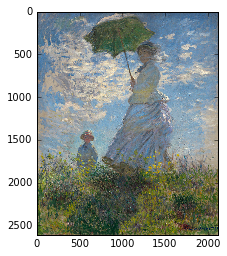

In [3]:
#img = cv2.imread("../_fig/_others/miporin.jpg")
img = cv2.imread("../_fig/monet/woman_withparasol.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [4]:
height, width, channels = img.shape
divh = 50
divw = 50
heights, widths, dividedimgs = divideimage(img, divw, divh)

In [5]:
dividedimgs.shape

(50, 50)

In [6]:
dividedimgs[0,0][0,0]

array([ 126.,  134.,  136.])

In [7]:
decolor_imgs = []
for ih in range(divh):
    temp = []
    for iw in range(divw):
        temp.append( mean_image(dividedimgs[ih,iw]) )
    decolor_imgs.append(temp)
decolor_imgs = np.array(decolor_imgs)

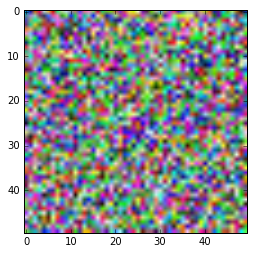

In [8]:
plt.imshow(decolor_imgs)

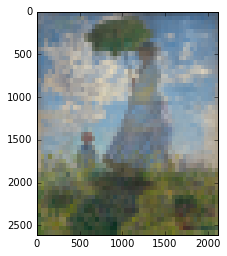

In [9]:
decolor_img = np.zeros((height,width,3), np.uint8)
for ih in range(0,2*divh-1,2):
    for iw in range(0,2*divw-1,2):
        cv2.rectangle(decolor_img, (widths[iw],heights[ih]), (widths[iw+1],heights[ih+1]), decolor_imgs[int(ih/2),int(iw/2)], -1, 0)
plt.imshow(decolor_img)